In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


### Target [Diagnosed diabetes] analysis

---

In the first section, we examined the distribution of the target variable using a bar chart. Now, we will explore the target again from a different perspective. As a starting point for our exploratory data analysis, it is important to understand how the target values are distributed.

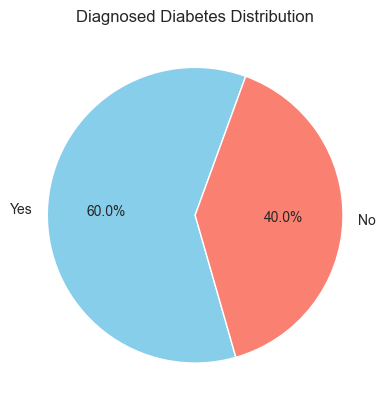

In [14]:
counts = data['diagnosed_diabetes'].value_counts()

plt.pie(
    counts,                   
    labels=['Yes', 'No'],     
    colors=['skyblue', 'salmon'], 
    autopct='%1.1f%%',  
    startangle=70
)

plt.title('Diagnosed Diabetes Distribution')
plt.ylabel("")
plt.show()

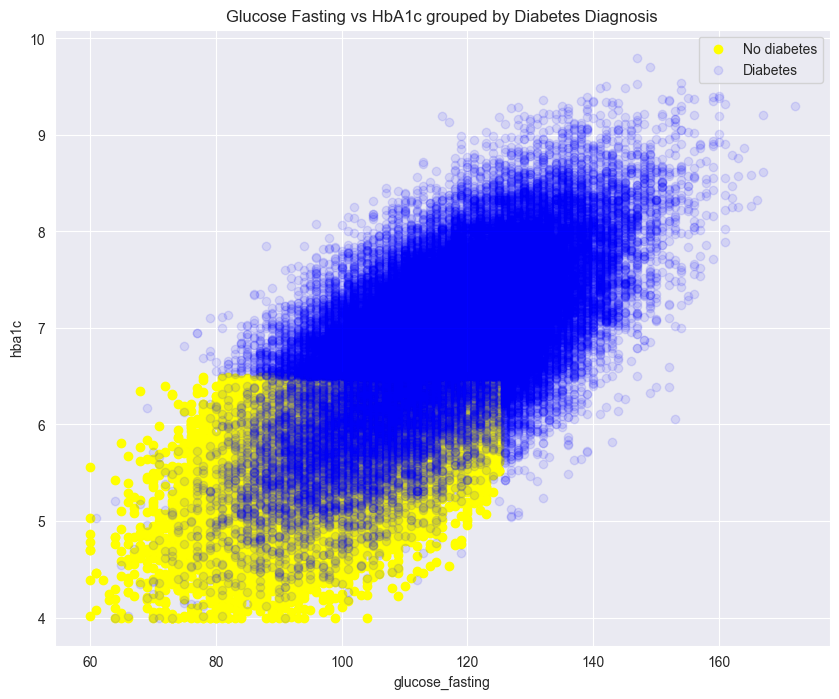

In [45]:
plt.figure(figsize=(10, 8))

diabetic = data[data['diagnosed_diabetes'] == 1]
non_diabetic = data[data['diagnosed_diabetes'] == 0]

plt.scatter(non_diabetic['glucose_fasting'], non_diabetic['hba1c'], 
            alpha=1, label='No diabetes', color='yellow')

plt.scatter(diabetic['glucose_fasting'], diabetic['hba1c'], 
            alpha=0.1, label='Diabetes', color='blue')

plt.xlabel('glucose_fasting')
plt.ylabel('hba1c')
plt.legend()
plt.title('Glucose Fasting vs HbA1c grouped by Diabetes Diagnosis')

plt.show()

The data follows established medical logic, and what may initially appear as a strange scatter plot is actually completely normal. Clinical criteria show that individuals without diabetes almost never exceed **6.4% HbA1c** or **125 mg/dL fasting glucose**. Therefore, the non-diabetic cluster is naturally confined within this range, which explains the sharp cutoff visible in the plot.

**Source (HbA1c diagnostic thresholds) and (Glucose fasting)**

American Diabetes Association (ADA). Diabetes Diagnosis Guidelines.

Available at: https://diabetes.org/about-diabetes/diagnosis

Available at: https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2775594?utm_source=chatgpt.com [mean age 75 years old]